## Testing output from simulations

### 2D simulations

In [1]:
from core import *
from quantum_plots import *
import pickle

def plot_entropies2d(M=5, root='data'):
    def load_mps(f, n):
        data, _ = pickle.load(f)
        out = []
        for (i,A) in enumerate(data):
            if isinstance(A, tuple):
                out.append((A[0], max(A[1]), A[3]))
            else:
                print(f'{i}-th simulation from {n}-th set failed with\n{A}')
        return np.array(out)
    
    filename=f'{root}/entropies2d-m{M}-mps.pkl'
    with open(filename,'rb') as f:
        data2 = load_mps(f, 2)
        data3 = load_mps(f, 3)
        data1 = load_mps(f, 1)

    fig = plot_setup(aspect_ratio=0.6/1.62, wide=True)
    ax = fig.add_subplot(1,2,1)
    ax.plot(data1[:,0], data1[:,1], label='$\\theta=0,$ order 1')
    ax.plot(data2[:,0], data2[:,1], label='$\\theta=\\pi/4,$ order 1')
    ax.plot(data3[:,0], data3[:,1], '--', label='$\\theta=\\pi/4,$ order 2')
    ax.set_xlabel('$\\sigma_{max}/\\sigma_{min}$')
    ax.set_ylabel('$\\mathrm{max}(S)$')
    ax.legend(frameon=False, fontsize=9)
    
    ax = fig.add_subplot(1,2,2)
    ax.plot(data1[:,0], data1[:,2], label='$\\theta=0,$ order 1')
    ax.plot(data2[:,0], data2[:,2], label='$\\theta=\\pi/4,$ order 1')
    ax.plot(data3[:,0], data3[:,2], label='$\\theta=\\pi/4,$ order 2')
    ax.set_xlabel('$\\sigma_{max}/\\sigma_{min}$')
    ax.set_ylabel('$\\epsilon_{bound}$')
    ax.set_yscale('log')
    
    plt.tight_layout()

Global props:
fontsizes :
     tiny :  6
     scriptsize :  8
     footnotesize :  9
     small :  10
     normalsize :  11
     large :  12
     Large :  14
     LARGE :  17
     huge :  20
     Huge :  25
colors :
     quantumviolet :  #53257F
     quantumgray :  #555555


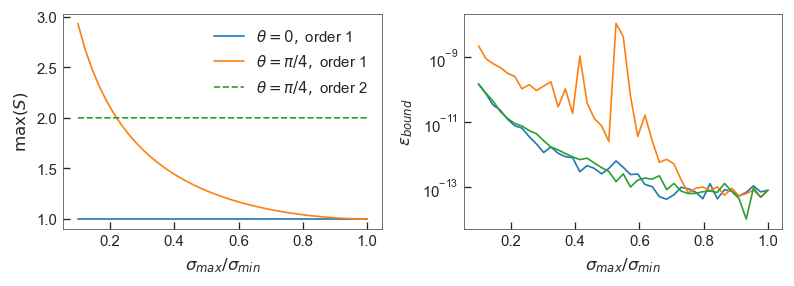

In [2]:
plot_entropies2d(11,root='data-mps')

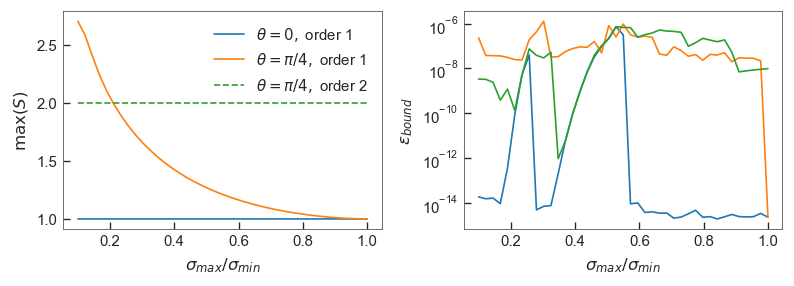

In [3]:
plot_entropies2d(5,root='data-mps')

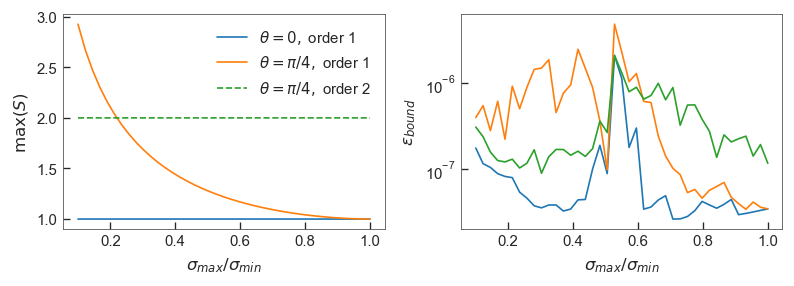

In [4]:
plot_entropies2d(7,root='data-mps')

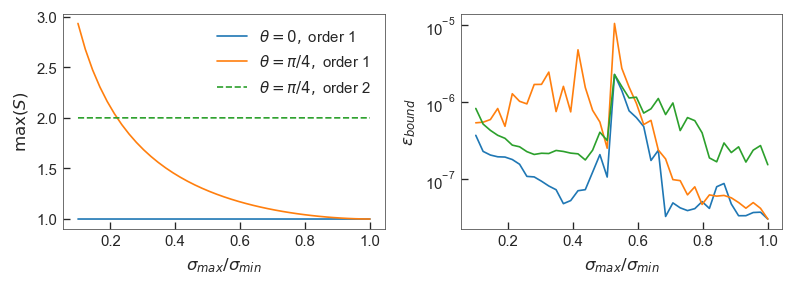

In [5]:
plot_entropies2d(9,root='data-mps')

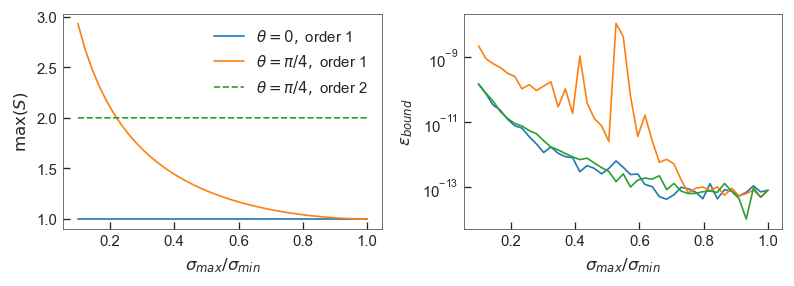

In [6]:
plot_entropies2d(11,root='data-mps')

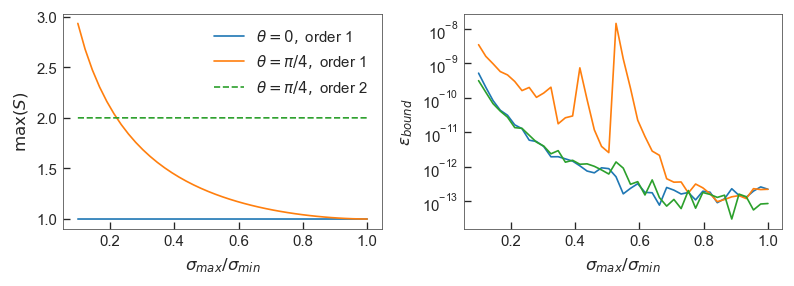

In [7]:
plot_entropies2d(14,root='data-mps')

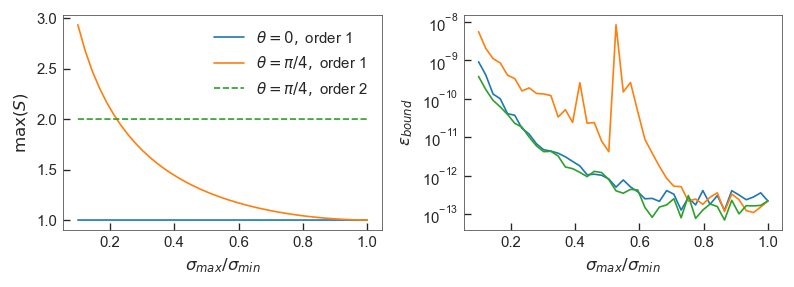

In [8]:
plot_entropies2d(16,root='data-mps')

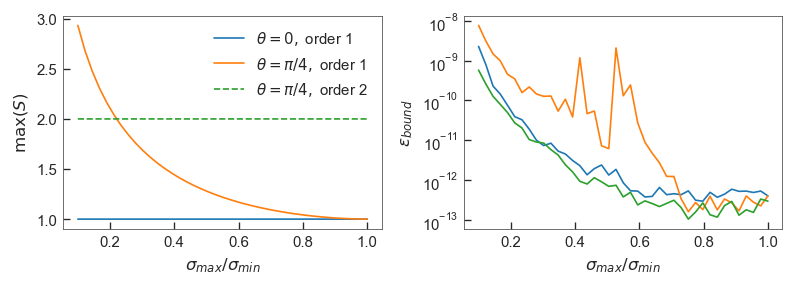

In [9]:
plot_entropies2d(18,root='data-mps')

### 3D systems

In [10]:
from core import *
from quantum_plots import *
import pickle 
def plot_entropies3d(M=5, root='data'):
    def load_mps(f, n):
        data, _ = pickle.load(f)
        out = []
        for (i,A) in enumerate(data):
            if isinstance(A, tuple):
                out.append((A[0], max(A[1]), A[3]))
            else:
                print(f'{i}-th simulation from {n}-th set failed with\n{A}')
        return np.array(out)
    
    filename=f'{root}/entropies3d-m{M}-mps.pkl'
    with open(filename,'rb') as f:
        data2 = load_mps(f, 2)
        data3 = load_mps(f, 3)
        data1 = load_mps(f, 1)

    fig = plot_setup(aspect_ratio=0.6/1.62, wide=True)
    ax = fig.add_subplot(1,2,1)
    ax.plot(data1[:,0], data1[:,1], label='$\\theta=0,$ order 1')
    ax.plot(data2[:,0], data2[:,1], label='$\\theta=\\pi/4,$ order 1')
    ax.plot(data3[:,0], data3[:,1], '--', label='$\\theta=\\pi/4,$ order 2')
    ax.set_xlabel('$\\sigma_{max}/\\sigma_{min}$')
    ax.set_ylabel('$\\mathrm{max}(S)$')
    ax.legend(frameon=False, fontsize=9)
    
    ax = fig.add_subplot(1,2,2)
    ax.plot(data1[:,0], data1[:,2], label='$\\theta=0,$ order 1')
    ax.plot(data2[:,0], data2[:,2], label='$\\theta=\\pi/4,$ order 1')
    ax.plot(data3[:,0], data3[:,2], label='$\\theta=\\pi/4,$ order 2')
    ax.set_xlabel('$\\sigma_{max}/\\sigma_{min}$')
    ax.set_ylabel('$\\epsilon_{bound}$')
    ax.set_yscale('log')
    
    plt.tight_layout()

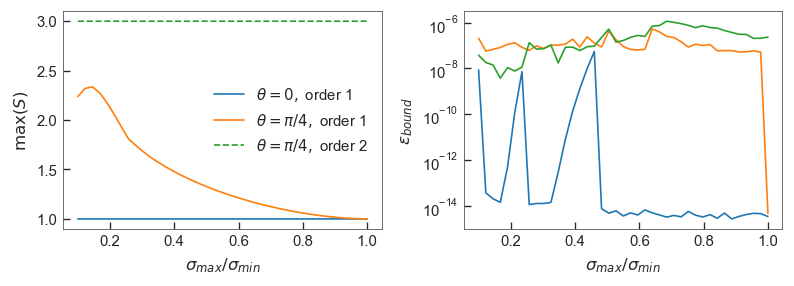

In [11]:
plot_entropies3d(M=5,root='data-mps')

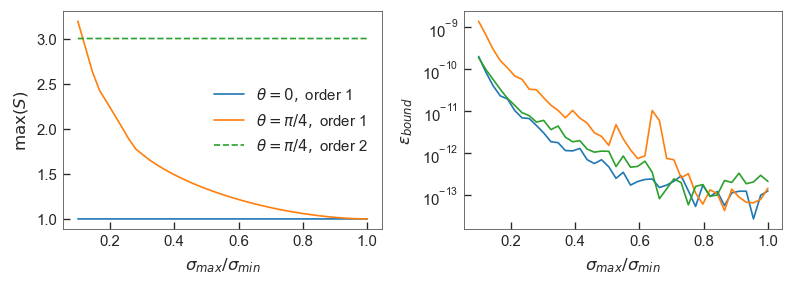

In [12]:
plot_entropies3d(7,root='data-mps')

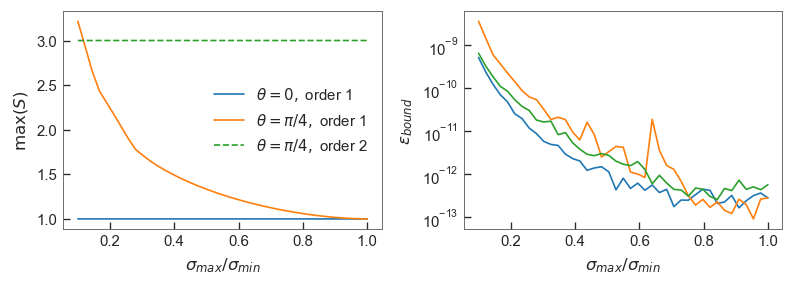

In [13]:
plot_entropies3d(9,root='data-mps')

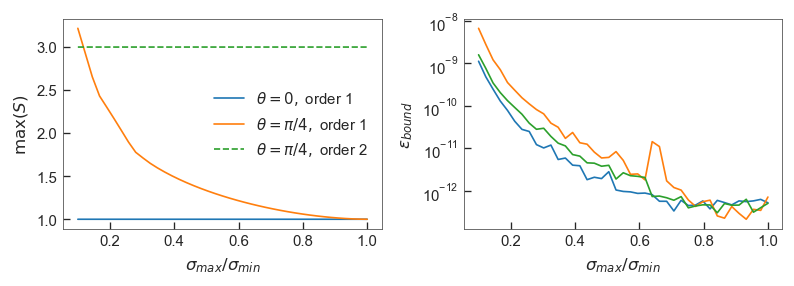

In [15]:
plot_entropies3d(11,root='data-mps')

-----

## Paper-quality plots

### 1D discretized states

In [7]:
Lognormal_GR(14, σ=1, μ=0)

(array([5.89664242e-05, 4.09091647e-04, 1.08285249e-03, ...,
        1.07600758e-04, 1.07584628e-04, 1.07568501e-04]),
 array([2.22044605e-16, 3.05175781e-03, 6.10351563e-03, ...,
        4.99908447e+01, 4.99938965e+01, 4.99969482e+01]))

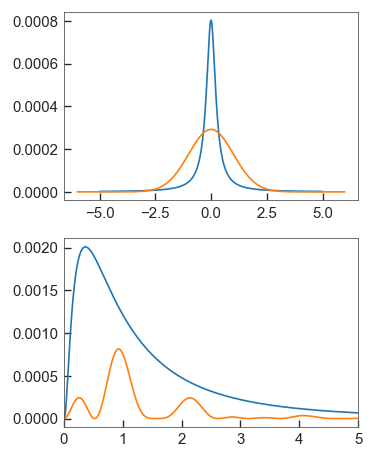

In [15]:
from core import *

def test():
    M = 14
    ms = np.arange(1,M+1)
    σ = 1.
    fig = plot_setup(aspect_ratio=1.22)
    ax = fig.add_subplot(2,1,1)
    ψ, x = Lorentzian_GR(M, σ=0.5, μ=0)
    ax.plot(x, ψ**2)
    ψ, x = Gaussian_GR(M, σ=1, μ=0)
    ax.plot(x, ψ**2)
    ax = fig.add_subplot(2,1,2)
    ψ, x = Lognormal_GR(M, σ=1, μ=0)
    ax.plot(x, ψ**2)
    ψ, x = Weird_GR(M, σ=1)
    ax.plot(x, ψ**2)
    ax.set_xlim([0,5])
    plt.tight_layout()
    plt.savefig('./figures/fig-curves.svg')
    
test()

Gaussian fit polynomial: [-1.84094537  3.8566379 ]
Lognormal fit polynomial: [-1.5989923   8.31354646]
Lorentzian fit polynomial: [-1.81557181  5.91131576]
Non-convex fit polynomial: [-1.797884    8.01289018]
Gaussian fit polynomial: [-1.86050928  4.36570897]
Lognormal fit polynomial: [-1.68263776  9.6877124 ]
Lorentzian fit polynomial: [-1.83172742  6.38734092]
Non-convex fit polynomial: [-1.8363159   8.72987938]


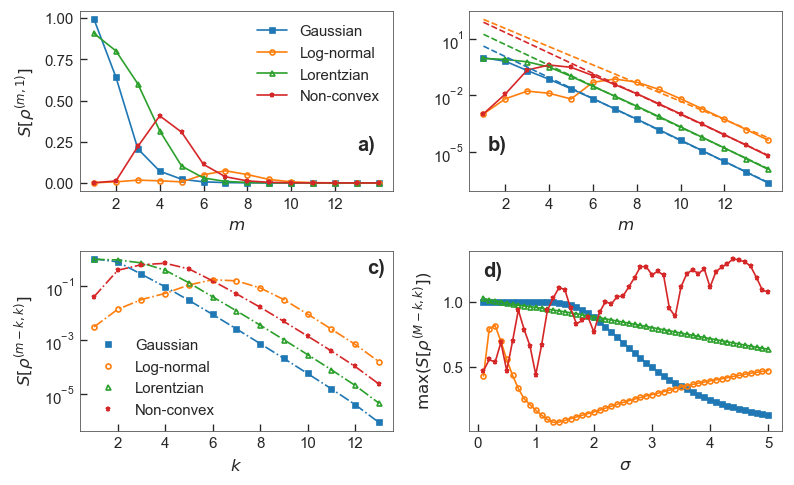

In [8]:
from core import *

def plot_entropies():
    M = 14
    ms = np.arange(1,M+1)
    σ = 1.
    S1 = [entropy
          for m in ms
          for ψ, _ in [Gaussian_GR(m+1, σ=1, μ=0)]
          for entropy, _ in [Schmidt(ψ, m, 1)]]
    S2 = [entropy
          for m in ms
          for ψ, _ in [Lognormal_GR(m+1, σ=1, μ=0)]
          for entropy, _ in [Schmidt(ψ, m, 1)]]
    S3 = [entropy
          for m in ms
          for ψ, _ in [Lorentzian_GR(m+1, σ=1, μ=0)]
          for entropy, _ in [Schmidt(ψ, m, 1)]]
    S4 = [entropy
          for m in ms
          for ψ, _ in [Weird_GR(m+1, σ=1)]
          for entropy, _ in [Schmidt(ψ, m, 1)]]
    a = -5*σ
    b = -a
    Dp = 1/(math.sqrt(2*np.exp(1)*π)*σ**2)
    S1est = 2.*(b-a)*np.sqrt(Dp)/(2**(ms/2))
    p = np.polyfit(ms[4:], np.log2(S1)[4:], 1)
    S1fit = 2**(p[1]+p[0]*ms)
    print(f'Gaussian fit polynomial: {p}')

    p = np.polyfit(ms[6:], np.log2(S2)[6:], 1)
    S2fit = 2**(p[1]+p[0]*ms)
    print(f'Lognormal fit polynomial: {p}')

    p = np.polyfit(ms[4:], np.log2(S3)[4:], 1)
    S3fit = 2**(p[1]+p[0]*ms)
    print(f'Lorentzian fit polynomial: {p}')

    p = np.polyfit(ms[6:], np.log2(S4)[6:], 1)
    S4fit = 2**(p[1]+p[0]*ms)
    print(f'Non-convex fit polynomial: {p}')

    fig = plot_setup(aspect_ratio=2/(2*1.62), wide=True)
    ax = fig.add_subplot(2,2,1)
    ax.plot(ms, S1, '-s', label='Gaussian', color=color1)
    ax.plot(ms, S2, '-o', label='Log-normal', color=color2, fillstyle='none')
    ax.plot(ms, S3, '-^', label='Lorentzian', color=color3, fillstyle='none')
    ax.plot(ms, S4, '-*', label='Non-convex', color=color4, fillstyle='none')
    ax.set_xlabel('$m$')
    ax.set_ylabel('$S[\\rho^{(m,1)}]$')
    ax.legend(frameon=False, fontsize=9)
    ax.set_xticks(list(range(2, 13, 2)))
    ax.text(13, 0.2, 'a)', fontweight='bold', fontsize=12)
    
    ax = fig.add_subplot(2,2,2)
    ax.plot(ms, S1, '-s', label='Gaussian', color=color1)
    ax.plot(ms, S2, '-o', label='Log-normal', color=color2, fillstyle='none')
    ax.plot(ms, S3, '-^', label='Lorentzian', color=color3, fillstyle='none')
    ax.plot(ms, S4, '-*', label='Non-convex', color=color4, fillstyle='none')
    ax.plot(ms, S1fit, '--', color=color1)
    ax.plot(ms, S2fit, '--', color=color2)
    ax.plot(ms, S3fit, '--', color=color3)
    ax.plot(ms, S4fit, '--', color=color4)
    ax.set_xlabel('$m$')
    #ax.set_ylabel('$S[\\rho^{(m,1)}]$')
    #ax.legend(frameon=False, fontsize=9)
    ax.set_yscale('log')
    ax.set_xticks(list(range(2, 13, 2)))
    ax.text(1.2, 1.2e-5, 'b)', fontweight='bold', fontsize=12)
    
    M = 14
    ms = np.arange(1,M)
    σ = 1.
    S1 = [entropy
          for ψ, _ in [Gaussian_GR(M, σ=1, μ=0)]
          for m in ms
          for entropy, _ in [Schmidt(ψ, m, M-m)]]
    S2 = [entropy
          for ψ, _ in [Lognormal_GR(M, σ=1, μ=0)]
          for m in ms
          for entropy, _ in [Schmidt(ψ, m, M-m)]]
    S3 = [entropy
          for ψ, _ in [Lorentzian_GR(M, σ=1, μ=0)]
          for m in ms
          for entropy, _ in [Schmidt(ψ, m, M-m)]]
    S4 = [entropy
          for ψ, _ in [Weird_GR(M, σ=1)]
          for m in ms
          for entropy, _ in [Schmidt(ψ, m, M-m)]]
    S1b = [entropy
          for ψ, _ in [Gaussian_GR(M, σ=1, μ=0, method='sampling')]
          for m in ms
          for entropy, _ in [Schmidt(ψ, m, M-m)]]
    S2b = [entropy
          for ψ, _ in [Lognormal_GR(M, σ=1, μ=0, method='sampling')]
          for m in ms
          for entropy, _ in [Schmidt(ψ, m, M-m)]]
    S3b = [entropy
          for ψ, _ in [Lorentzian_GR(M, σ=1, μ=0, method='sampling')]
          for m in ms
          for entropy, _ in [Schmidt(ψ, m, M-m)]]
    S4b = [entropy
          for ψ, _ in [Weird_GR(M, σ=1, method='sampling')]
          for m in ms
          for entropy, _ in [Schmidt(ψ, m, M-m)]]
    a = -5*σ
    b = -a
    Dp = 1/(math.sqrt(2*np.exp(1)*π)*σ**2)
    S1est = 2.*(b-a)*np.sqrt(Dp)/(2**(ms/2))
    p = np.polyfit(ms[4:], np.log2(S1)[4:], 1)
    S1fit = 2**(p[1]+p[0]*ms)
    print(f'Gaussian fit polynomial: {p}')

    p = np.polyfit(ms[6:], np.log2(S2)[6:], 1)
    S2fit = 2**(p[1]+p[0]*ms)
    print(f'Lognormal fit polynomial: {p}')

    p = np.polyfit(ms[4:], np.log2(S3)[4:], 1)
    S3fit = 2**(p[1]+p[0]*ms)
    print(f'Lorentzian fit polynomial: {p}')

    p = np.polyfit(ms[6:], np.log2(S4)[6:], 1)
    S4fit = 2**(p[1]+p[0]*ms)
    print(f'Non-convex fit polynomial: {p}')

    ax = fig.add_subplot(2,2,3)
    ax.plot(ms, S1, 's', label='Gaussian', color=color1)
    ax.plot(ms, S2, 'o', label='Log-normal', color=color2, fillstyle='none')
    ax.plot(ms, S3, '^', label='Lorentzian', color=color3, fillstyle='none')
    ax.plot(ms, S4, '*', label='Non-convex', color=color4, fillstyle='none')
    ax.plot(ms, S1b, '-.', color=color1)
    ax.plot(ms, S2b, '-.', color=color2)
    ax.plot(ms, S3b, '-.', color=color3)
    ax.plot(ms, S4b, '-.', color=color4)
    ax.set_xlabel('$k$')
    ax.set_ylabel('$S[\\rho^{(m-k,k)}]$')
    ax.legend(frameon=False, fontsize=9)
    ax.set_xticks(list(range(2, 13, 2)))
    ax.set_yscale('log')
    ax.text(12.5, 0.3, 'c)', fontweight='bold', fontsize=12)
    
    M = 14
    ms = np.arange(1,M)
    σ = 1.
    a = -6*σ
    b = -a
    allσ = np.linspace(0.1,5)
    S1c = np.array([max([entropy
           for ψ, _ in [Gaussian_GR(M, σ=σ, μ=0, a=-7, b=7)]
           for m in ms
           for entropy, _ in [Schmidt(ψ, m, M-m)]])
           for σ in allσ])
    S2c = np.array([max([entropy
           for ψ, _ in [Lognormal_GR(M, σ=σ, μ=1., a=epsilon, b=50)]
           for m in ms
           for entropy, _ in [Schmidt(ψ, m, M-m)]])
           for σ in allσ])
    S3c = np.array([max([entropy
           for ψ, _ in [Lorentzian_GR(M, σ=σ, μ=0., a=-10, b=10)]
           for m in ms
           for entropy, _ in [Schmidt(ψ, m, M-m)]])
           for σ in allσ])
    S4c = np.array([max([entropy
           for ψ, _ in [Weird_GR(M, σ=σ, a=0., b=10)]
           for m in ms
           for entropy, _ in [Schmidt(ψ, m, M-m)]])
           for σ in allσ])
    
    ax = fig.add_subplot(2,2,4)
    ax.plot(allσ, S1c, '-s', label='Gaussian', color=color1)
    ax.plot(allσ, S2c, '-o', label='Log-normal', color=color2, fillstyle='none')
    ax.plot(allσ, S3c, '-^', label='Lorentzian', color=color3, fillstyle='none')
    ax.plot(allσ, S4c, '-*', label='Non-convex', color=color4, fillstyle='none')
    ax.set_xlabel('$\\sigma$')
    ax.set_ylabel('$\\max(S[\\rho^{(M-k,k)}])$')
    ax.text(0.1, 1.20, 'd)', fontweight='bold', fontsize=12)
    plt.tight_layout()
    plt.savefig('./figures/fig-entropies.pdf')
    plt.savefig('./figures/fig-entropies.svg')
    
plot_entropies()

### 2D MPS and non-MPS

In [1]:
from core import *
from core_mps import *
from quantum_plots import *
from matplotlib.patches import Arc

def load_mps(f, n):
    data, _ = pickle.load(f)
    out = []
    for (i,A) in enumerate(data):
        if isinstance(A, tuple):
            out.append((A[0], max(A[1]), A[3]))
        else:
            print(f'{i}-th simulation from {n}-th set failed with\n{A}')
    return np.array(out), data

f2d='data/entropies2d-m14.pkl'
f2dmps='data/entropies2d-m18-mps.pkl'
with open(f2d,'rb') as f:
    M, σs, S1, S2, S3, S4 = pickle.load(f)
with open(f2dmps,'rb') as f:
    S3mps, p1mps0 = load_mps(f, 3); p1mps = p1mps0[0][1]
    S4mps, p2mps0 = load_mps(f, 4); p2mps = p2mps0[0][1]
    S1mps, p3mps0 = load_mps(f, 1)
    Mmps = len(p1mps)/2

Global props:
fontsizes :
     tiny :  6
     scriptsize :  8
     footnotesize :  9
     small :  10
     normalsize :  11
     large :  12
     Large :  14
     LARGE :  17
     huge :  20
     Huge :  25
colors :
     quantumviolet :  #53257F
     quantumgray :  #555555


In [5]:
import os.path
if not os.path.exists('data/schmidt-values-2d-m12.pkl'):
    aux_ψ, _ = GaussianNd(12,cmatrix2d([1,0.1],π/4))
    p1 = [Schmidt(aux_ψ, i, 24-i) for i in range(1,24)]
    aux_ψ = reorder2d(aux_ψ, 12, 2)
    p2 = [Schmidt(aux_ψ, i, 24-i) for i in range(1,24)]
    with open('data/schmidt-values-2d-m12.pkl','wb') as f:
        pickle.dump((p1,p2),f)
with open('data/schmidt-values-2d-m12.pkl','rb') as f:
    p1, p2 = pickle.load(f)

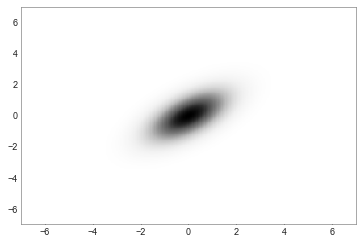

In [6]:
aux_ψ, aux_r = GaussianNd(8,cmatrix2d([1.0,0.5],π/4.))
aux_x = aux_r[:,:,0]
aux_y = aux_r[:,:,1]
plt.pcolormesh(aux_x, aux_y, aux_ψ)

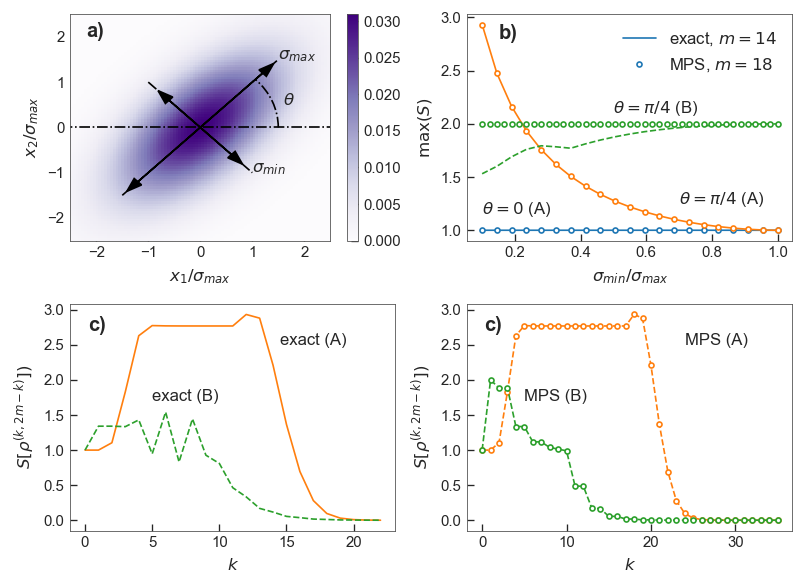

In [7]:
fig = plot_setup(aspect_ratio=1.2/1.62, wide=True)
ax = fig.add_subplot(2,2,1)
C = ax.pcolormesh(aux_x, aux_y, aux_ψ, cmap='Purples');
plt.colorbar(C)
v = np.linspace(-1,1,10)
ax.plot(1.5*v, 1.5*v, 'k-.')
ax.plot(v, -v, 'k-.')
ax.plot(3*v, 0*v, 'k-.')
ax.arrow(0,0,1.2,1.2,head_width=0.2,facecolor='k')
ax.arrow(0,0,-1.2,-1.2,head_width=0.2,facecolor='k')
ax.arrow(0,0,0.6,-0.6,head_width=0.2,facecolor='k')
ax.arrow(0,0,-0.6,0.6,head_width=0.2,facecolor='k')
ax.add_patch(Arc((0,0),3,3, theta1=0.0, theta2=45, edgecolor='k', linestyle='-.'))
ax.text(1.5, 1.5, '$\\sigma_{max}$');
ax.text(1, -1, '$\\sigma_{min}$');
ax.text(1.6, 0.5, '$\\theta$')
ax.set_xlabel('$x_1/\\sigma_{max}$')
ax.set_ylabel('$x_2/\\sigma_{max}$')
ax.set_xlim([-2.5,2.5])
ax.set_ylim([-2.5,2.5]);
ax.text(-2.2,2,'a)', fontweight='bold',fontsize=12)

ax = fig.add_subplot(2,2,2)
ax.plot(σs, S1, '-', label=f'exact, $m={M}$', color=color1)
ax.plot(S1mps[::2,0], S1mps[::2,1], 'o', label=f'MPS, $m={int(Mmps)}$', color=color1, mfc='w')
ax.plot(σs, S3, '-', color=color2)
ax.plot(σs, S4, '--', color=color3)
ax.plot(S3mps[::2,0], S3mps[::2,1], 'o', color=color2, mfc='w')
ax.plot(S4mps[:,0], S4mps[:,1], 'o', color=color3, mfc='w')
ax.text(0.5, 2.1, '$\\theta=\\pi/4$ (B)')
ax.text(0.7, 1.25, '$\\theta=\\pi/4$ (A)')
ax.text(0.1, 1.15, '$\\theta=0$ (A)')
ax.set_xlabel('$\\sigma_{min}/\\sigma_{max}$')
ax.set_ylabel('$\\mathrm{max}(S)$')
ax.legend(loc='upper right',frameon=False)
ax.text(0.15,2.8,'b)', fontweight='bold',fontsize=12)

ax = fig.add_subplot(2,2,3)
ax.plot([S for S,_ in p1], '-', label=f'$\\theta=\\pi/4, m={M}$ (A)',color=color2)
ax.plot([S for S,_ in p2], '--',label=f'$\\theta=\\pi/4, m={M}$ (B)',color=color3)
ax.text(5,1.7,'exact (B)')
ax.text(14.5,2.5,'exact (A)')
ax.set_xlabel('$k$')
ax.set_ylabel('$S[\\rho^{(k,2m-k)}])$')
ax.text(0.2,2.7,'c)', fontweight='bold',fontsize=12)

ax = fig.add_subplot(2,2,4)
ax.text(5,1.7,'MPS (B)')
ax.text(24,2.5,'MPS (A)')
ax.plot(p1mps, '--o', label=f'$\\theta=\\pi/4, m={M}$ (A)',color=color2, mfc='w')
ax.plot(p2mps, '--o', label=f'$\\theta=\\pi/4, m={M}$ (B)',color=color3, mfc='w')
ax.set_xlabel('$k$')
ax.set_ylabel('$S[\\rho^{(k,2m-k)}])$')
ax.text(0.2,2.7,'c)', fontweight='bold',fontsize=12)

plt.tight_layout()
plt.savefig('./figures/fig-entropies2d.pdf')
plt.savefig('./figures/fig-entropies2d.svg')

### 3D MPS and non-MPS simulations

In [18]:
import pickle
from mpl_toolkits.mplot3d.axes3d import get_test_data
from mpl_toolkits.mplot3d import Axes3D
from matplotlib import cm

def plot_3d_gaussian(m=8, σ=0.4, θ1=π/4, θ2=π/4, ax=None):
    if ax is None:
        fig = plot_setup(aspect_ratio=1., wide=False)
        ax = fig.add_subplot(1,1,1,projection='3d')
    U1 = np.array([[1,0,0],
                   [0,math.cos(θ1), math.sin(θ1)],
                   [0,-math.sin(θ1), math.cos(θ1)]])
    U2 = np.array([[math.cos(θ2), math.sin(θ2), 0],
                   [-math.sin(θ2), math.cos(θ2), 0],
                   [0,0,1]])
    O = U1 @ U2
    Σ = O.T @ np.diag([σ,1,σ]) @ O
    aux_ψ, aux_r = GaussianNd(m,Σ,b=3*np.ones(3),a=-3*np.ones(3))
    aux_ψ *= aux_ψ
    aux_x = aux_r[:,:,:,0]
    aux_y = aux_r[:,:,:,1]
    aux_z = aux_r[:,:,:,2]
    if True:
        pz = np.sum(aux_ψ,-1)
        pz = cm.Purples(pz / np.max(pz.flatten()))
        C = ax.plot_surface(aux_x[:,:,0], aux_y[:,:,0], 1.05*aux_z[:,:,0], facecolors=pz, cmap='Purples');
        px = np.sum(aux_ψ,0)
        px = cm.Purples(px / np.max(px.flatten()))
        C = ax.plot_surface(1.05*aux_x[0,:,:], aux_y[0,:,:], aux_z[0,:,:], facecolors=px, cmap='Purples');
        py = np.sum(aux_ψ,0)
        py = cm.Purples(py / np.max(py.flatten()))
        C = ax.plot_surface(aux_x[:,-1,:], 1.05*aux_y[:,-1,:], aux_z[:,-1,:], facecolors=py, cmap='Purples');
    if True:
        N = 1000
        ndx = np.random.choice(np.arange(aux_ψ.size), size=N, p = aux_ψ.flatten())
        plt.plot(aux_x.flatten()[ndx],aux_y.flatten()[ndx],aux_z.flatten()[ndx],',',color=color2)
    r0 = aux_r[0,0,0,:]*0.96
    rf = aux_r[-1,-1,-1,:]*0.96
    print(r0)
    print(rf)
    ax.plot([r0[0],r0[0]],[rf[1],rf[1]],[r0[2],rf[2]], 'k-', linewidth=1)
    ax.plot([r0[0],rf[0]],[rf[1],rf[1]],[r0[2],r0[2]], 'k-', linewidth=1)
    ax.plot([r0[0],r0[0]],[r0[1],rf[1]],[r0[2],r0[2]], 'k-', linewidth=1)
    ax.view_init(elev=20., azim=-40)
    
    for (w,σ) in zip(O,[σ,1,σ]):
        v = 2*σ*w
        ax.plot([-v[0],v[0]],[-v[1],v[1]],[-v[2],v[2]], 'k-.')
    
    ax.set_xlim(aux_x[[0,-1],0,0])
    ax.set_ylim(aux_y[0,[0,-1],0])
    ax.set_zlim(aux_z[0,0,[0,-1]])

In [64]:
f3d='data/entropies3d-m7.pkl'
f3dmps='data/entropies3d-m11-mps.pkl'
    
def load_mps(f, n):
    data, _ = pickle.load(f)
    out = []
    for (i,A) in enumerate(data):
        if isinstance(A, tuple):
            out.append((A[0], max(A[1]), A[3]))
        else:
            print(f'{i}-th simulation from {n}-th set failed with\n{A}')
    return np.array(out), data

with open(f3d,'rb') as f:
    M3d, σs3d, S13d, S33d, S43d = pickle.load(f)
with open(f3dmps,'rb') as f:
    S33dmps, p1mps0 = load_mps(f, 3);
    S43dmps, p2mps0 = load_mps(f, 4);
    S13dmps, _ = load_mps(f, 1)
    M3dmps = len(p1mps0[0][4])/2


Size in megabytes of the 3d simulations

In [65]:
sizes33 = [sum(np.zeros(shape).size * np.array(0.0).itemsize / (1024**2) for shape in sim[4]) for sim in p1mps0]

In [66]:
sizes43 = [sum(np.zeros(shape).size * np.array(0.0).itemsize / (1024**2) for shape in sim[4]) for sim in p2mps0]

[-2.88 -2.88 -2.88]
[2.88 2.88 2.88]


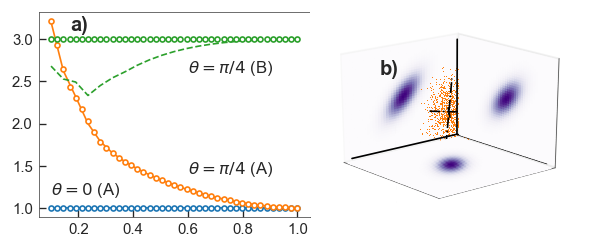

In [23]:
fig = plot_setup(aspect_ratio=0.7/1.62, wide=True, width_ratio=0.75)

ax = fig.add_subplot(1,2,1)
ax.plot(σs3d, S13d, '-', label=f'exact, $m={M3d}$', color=color1)
ax.plot(S13dmps[:,0], S13dmps[:,1], 'o', label=f'MPS, $m={M3dmps}$', color=color1, mfc='w')
ax.plot(σs3d, S33d, '-', color=color2)
ax.plot(σs3d, S43d, '--', color=color3)
ax.plot(S33dmps[:,0], S33dmps[:,1], 'o', color=color2, mfc='w')
ax.plot(S43dmps[:,0], S43dmps[:,1], 'o', color=color3, mfc='w')
ax.text(0.6, 2.6, '$\\theta=\\pi/4$ (B)')
ax.text(0.6, 1.4, '$\\theta=\\pi/4$ (A)')
ax.text(0.1, 1.15, '$\\theta=0$ (A)')
#ax.set_xlabel('$\\sigma_{min}/\\sigma_{max}$')
#ax.set_ylabel('$\\mathrm{max}(S)$')
ax.text(0.17,3.1,'a)', fontweight='bold',fontsize=12)

ax = fig.add_subplot(1,2,2, projection='3d')
plot_3d_gaussian(ax=ax)
ax.text(-2,-2,2,'b)', fontweight='bold',fontsize=12)
ax.set_xticks([])
ax.set_yticks([])
ax.set_zticks([])

plt.tight_layout()
plt.subplots_adjust(wspace=0)
plt.savefig('./figures/fig-entropies3d.pdf')

### Fokker-Planck

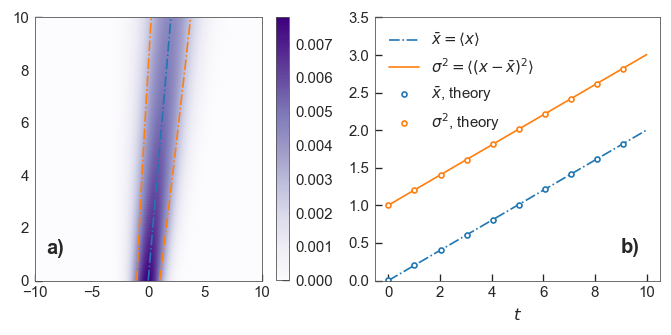

In [26]:
import pickle
import matplotlib.pyplot as plt
from quantum_plots import *
import numpy as np

with open('data/fokker-planck-2d-a.pkl','rb') as f:
    ψ, x, times, D, μ, b = pickle.load(f)
    
ψ = np.array(ψ).T
ψ = ψ / np.sum(ψ,0)
fig = plot_setup(wide=True, aspect_ratio=0.7/1.62)

ax = fig.add_subplot(1,2,2)
xm = x @ ψ
x2 = (x**2) @ ψ
σm = x2 - xm**2
xt = xm[0] - μ * times
σt = np.sqrt(σm[0] + 2*D*times)
ax.plot(times, xm, '-.', label='$\\bar{x}=\\langle{x}\\rangle$')
ax.plot(times, σm, label='$\\sigma^2=\\langle{(x-\\bar{x})^2}\\rangle$')
ax.plot(times[::10], xt[::10], 'o', color=color1, mfc='w', label='$\\bar{x}$, theory')
ax.plot(times[::10], σt[::10]**2, 'o', color=color2, mfc='w', label='$\\sigma^2$, theory')
ax.set_xlabel('$t$')
ax.legend(fontsize=9,frameon=False)
ax.set_ylim([0,3.5])
ax.text(9, 0.37, 'b)', fontweight='bold', fontsize=12)

ax = fig.add_subplot(1,2,1)
C = ax.pcolormesh(x, times, ψ.T, cmap='Purples')
ax.plot(xt, times, '-.', color=color1)
ax.plot(xt+σt, times, '-.', color=color2)
ax.plot(xt-σt, times, '-.', color=color2)
ax.text(-9,1,'a)', fontweight='bold', fontsize=12)
plt.colorbar(C)
plt.savefig('./figures/fig-FP.pdf')

Text(0, 0.5, '$t$')

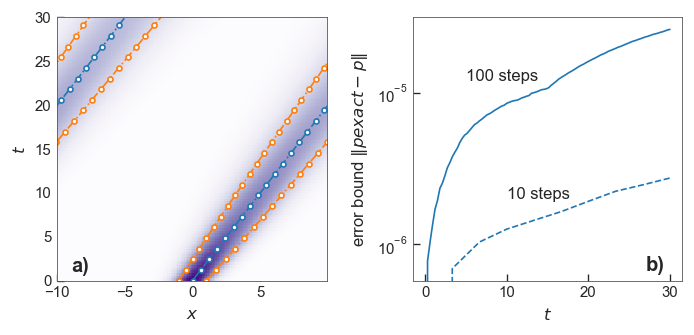

In [11]:
import pickle
import matplotlib.pyplot as plt
from quantum_plots import *
import numpy as np

with open('data/fokker-planck-2d-c.pkl','rb') as f:
    ψ, x, times, errors, D, μ, b = pickle.load(f)
    errors = errors[0::2]
    ψ = np.abs(ψ)
with open('data/fokker-planck-2d-e.pkl','rb') as f:
    _, _, times2, errors2, _, _, _ = pickle.load(f)
    errors2 = errors2[0::2]
    
ψ = np.array(ψ).T
ψ = ψ / np.sum(ψ,0)
fig = plot_setup(wide=True, aspect_ratio=0.7/1.62)

ax = fig.add_subplot(1,2,2)
xm = x @ ψ
x2 = (x**2) @ ψ
σm = x2 - xm**2
xt = xm[0] + μ * times
σt = np.sqrt(σm[0] + 2*D*times)
if False:
    ax.plot(times, xm, '-.', label='$\\bar{x}=\\langle{x}\\rangle$')
    ax.plot(times, σm, label='$\\sigma^2=\\langle{(x-\\bar{x})^2}\\rangle$')
    ax.plot(times[::4], xm[0] + μ * times[::4], 'o', color=color1, mfc='w', label='$\\bar{x}$, theory')
    ax.plot(times[::4], σm[0] + 2 * D * times[::4], 'o', color=color2, mfc='w', label='$\\sigma^2$, theory')
    ax.set_xlabel('$t$')
    ax.set_xlim([0,8])
    ax.set_ylim([0,4])
    #ax.text(5,3.5,'$\\bar{x}=\\langle{x}\\rangle$')
    #ax.text(4.5,1.6,'$\\sigma^2=\\langle{(x-\\bar{x})^2}\\rangle$')
    ax.legend(fontsize=10,frameon=False)
    ax.text(7,0.15,'a)', fontweight='bold', fontsize=12)
ax.plot(times, np.sqrt(errors))
ax.plot(times2, np.sqrt(errors2), '--',color=color1)
ax.set_yscale('log')
ax.set_xlabel('$t$')
ax.set_ylabel('error bound $\\Vert{p{exact}-p}\\Vert$')
ax.text(27,0.67e-6,'b)',fontsize=12,fontweight='bold')
ax.text(5,1.2e-5,'100 steps')
ax.text(10,0.2e-5,'10 steps')
fig.subplots_adjust(wspace=0.32)

ax = fig.add_subplot(1,2,1)
x = x[::100]
ψ = ψ[::100,:]
C = ax.pcolormesh(x, times, ψ.T, cmap='Purples')
ax.plot(xt, times, '-.', color=color1)
ax.plot(xt+σt, times, '-.', color=color2)
ax.plot(xt-σt, times, '-.', color=color2)
ax.plot(xt[::4], times[::4], 'o', color=color1, mfc='w')
ax.plot(xt[::4]+σt[::4], times[::4], 'o', color=color2, mfc='w')
ax.plot(xt[::4]-σt[::4], times[::4], 'o', color=color2, mfc='w')
ax.plot(2*x[0]+xt, times, '-.', color=color1)
ax.plot(2*x[0]+xt+σt, times, '-.', color=color2)
ax.plot(2*x[0]+xt-σt, times, '-.', color=color2)
ax.plot(2*x[0]+xt[::4], times[::4], 'o', color=color1, mfc='w')
ax.plot(2*x[0]+xt[::4]+σt[::4], times[::4], 'o', color=color2, mfc='w')
ax.plot(2*x[0]+xt[::4]-σt[::4], times[::4], 'o', color=color2, mfc='w')
ax.set_xlim(x[[0,-1]])
ax.text(-9,1,'a)', fontweight='bold', fontsize=12)
ax.set_xlabel('$x$')
ax.set_ylabel('$t$')

#plt.savefig('./figures/fig-FP-QFT.pdf')